In [3]:
                 #NEWS CLASSIFICATION ASSIGNMENT   
    #News Category 
    # A set Algorithmns to categories news based on their headlines
    #Import libraries.
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
print(os.listdir("../input"))



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
    #Meta Information Of the Dataset
    #Data preparation
     #Data preprocessing
     #Getting the data Head
    #Visualizing the First Five Data Record
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline
#working with Downloaded Dataset
#df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True) can also work
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.head()


In [12]:
#Data preprocessing
#Getting the data tail
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.tail()


,link,headline,category,short_description,authors,date
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28
209526,https://www.huffingtonpost.com/entry/dwight-ho...,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...,,2012-01-28


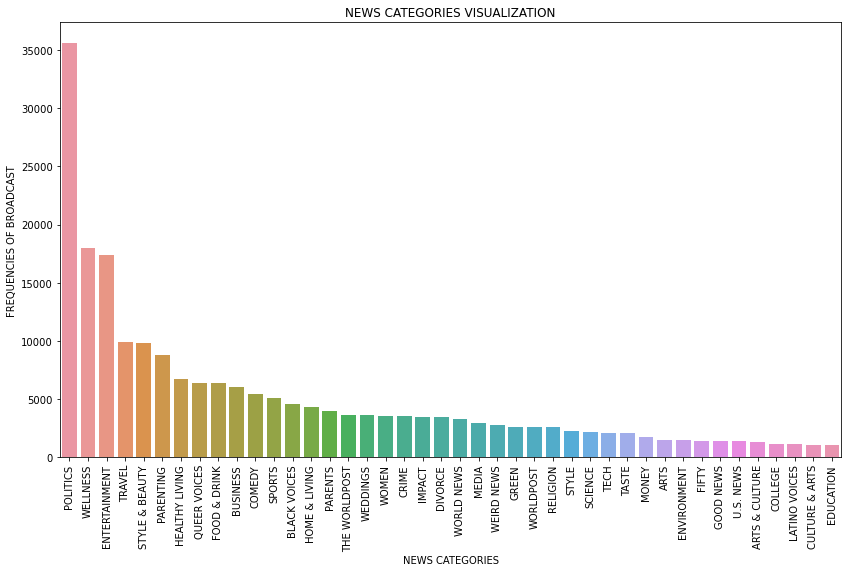

In [7]:
   #Visualizing The News dataset in A graphical Model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
count = df.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.ylabel('FREQUENCIES OF BROADCAST')
plt.xlabel('NEWS CATEGORIES')
plt.title('NEWS CATEGORIES VISUALIZATION')
plt.xticks(rotation=90);

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


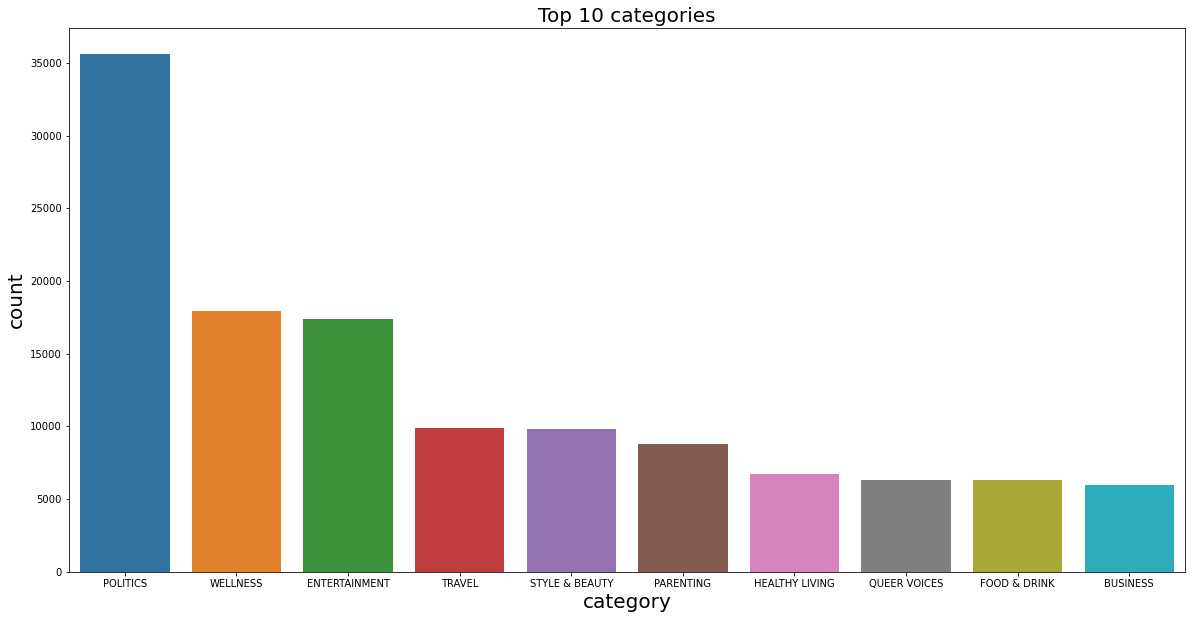

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
category_label = df.category.value_counts()[:10]
plt.figure(figsize=(20, 10))
sns.barplot(category_label.index, category_label)
plt.xlabel('category', fontsize=20)
plt.ylabel('count', fontsize=20);
plt.title('Top 10 categories', fontsize=20);

In [23]:
category_label_enc = {value: key for key, value in enumerate(df.category.unique())}
category_label_enc

{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21,
 'BLACK VOICES': 22,
 'TRAVEL': 23,
 'MONEY': 24,
 'RELIGION': 25,
 'LATINO VOICES': 26,
 'IMPACT': 27,
 'WEDDINGS': 28,
 'COLLEGE': 29,
 'PARENTS': 30,
 'ARTS & CULTURE': 31,
 'STYLE': 32,
 'GREEN': 33,
 'TASTE': 34,
 'HEALTHY LIVING': 35,
 'THE WORLDPOST': 36,
 'GOOD NEWS': 37,
 'WORLDPOST': 38,
 'FIFTY': 39,
 'ARTS': 40,
 'DIVORCE': 41}

In [8]:
#Visualizing News Groupings and getting the total number of each News set
Newscategory = df.groupby('category')
print("The Total News categories:", Newscategory .ngroups)
print(Newscategory .size())



The Total News categories: 42
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4583
BUSINESS           5992
COLLEGE            1144
COMEDY             5400
CRIME              3562
CULTURE & ARTS     1074
DIVORCE            3426
EDUCATION          1014
ENTERTAINMENT     17362
ENVIRONMENT        1444
FIFTY              1401
FOOD & DRINK       6340
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4320
IMPACT             3484
LATINO VOICES      1130
MEDIA              2944
MONEY              1756
PARENTING          8791
PARENTS            3955
POLITICS          35602
QUEER VOICES       6347
RELIGION           2577
SCIENCE            2206
SPORTS             5077
STYLE              2254
STYLE & BEAUTY     9814
TASTE              2096
TECH               2104
THE WORLDPOST      3664
TRAVEL             9900
U.S. NEWS          1377
WEDDINGS           3653
WEIRD NEWS         2777
WELLNESS          17945
WOMEN              3572
W

In [ ]:
 #Data Cleaning

import string
import nltk
import numpy as np
import pandas as pd
import re
import json

def clean_text(text):
    words = nltk.tokenize.word_tokenize(text)
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip() # remove any repeated gaps
    stopwords = nltk.corpus.stopwords.words('english')#Clears all stop words
    text =  re.sub(r'@\S+', '',text) # Clears all twitter handles
    text = text.lower()      # Tries to lower-case all characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')# stores only words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    text =  re.sub(r'http\S+', '',text) # remove any urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)# only characters are left
   
    return text

In [9]:
#Data cleaning is carried out
df['Text_cleaning'] = df.headline.apply(clean_text)
df.head()

NameError: name 'clean_text' is not defined

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [107]:
#Establishing if there is any null Values in the data columns
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [106]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)



In [98]:
df.head()

,category,short_description,c2id
0,U.S. NEWS,Health experts said it is too early to predict...,35
1,U.S. NEWS,He was subdued by passengers and crew when he ...,35
2,COMEDY,"""Until you have a dog you don't understand wha...",5
3,PARENTING,"""Accidentally put grown-up toothpaste on my to...",22
4,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,35


In [64]:
da.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
df.head()

In [82]:
#News categorized only based on the  Headlines,Category and Short Descriptions
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.drop(['authors','link','date'],axis=1,inplace=True)

In [83]:
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [78]:
#News categorized only based on the Category and Headline as Text Column Title
df.head()

,category,Text
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li..."
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...


In [84]:
#News classifications Based only on the Category and Descriptions
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.drop(['authors','link','date','headline'],axis=1,inplace=True)

In [85]:
#Displays only the FIRST Five News Categories based on the Category and Short  Descriptions

df.head()

,category,short_description
0,U.S. NEWS,Health experts said it is too early to predict...
1,U.S. NEWS,He was subdued by passengers and crew when he ...
2,COMEDY,"""Until you have a dog you don't understand wha..."
3,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [ ]:
#Displays only the lAST Five News Categories based on the Category and Short Descriptions
df.tail()

In [ ]:
categories = df.groupby('category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['category'].apply(lambda x: category_int[x])



In [ ]:
df.head()

In [4]:
import pandas as pd

df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df['category'].unique()
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [5]:
# most frequent unigrams of news belongs 'SCIENCE' category
category_ngram('SCIENCE', 1)

NameError: name 'category_ngram' is not defined

In [ ]:
# most frequent bigrams of news belongs 'SPORTS' category
category_ngram('SPORTS', 2)

In [ ]:
# most frequent trigrams of news belongs 'POLITICS' category
category_ngram('POLITICS', 3)

In [1]:
#others
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df['category'].unique()
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [17]:
for i in range (0,50000):
    if(len(word_tokenize(df['short_description'][i])) == 0):
        df['short_description'][i] = np.nan

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\n/nltk_data'
    - 'C:\\Users\\n\\anaconda3\\nltk_data'
    - 'C:\\Users\\n\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\n\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\n\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [16]:
#Determines the News Components with null values
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [24]:
df= df.dropna()
df=df.reset_index(drop=True)
print(df.shape)


(209527, 6)


In [25]:
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [26]:
#Gives the News Headlines in UPPERCASE
df['headline'] = df['headline'].str.lower()
import re
from bs4 import BeautifulSoup
for i in range (100,200):
    print(df['headline'][i])
    print()

u.s.: russia to buy rockets, artillery shells from north korea

harry styles say he feels like he has 'no idea what i'm doing' when acting

michigan secretary of state worried about ‘violence and disruption’ going into midterms

citing imminent danger cloudflare drops hate site kiwi farms

bear spotted chilling in california swimming pool

uvalde fourth graders waited an hour with wounded teacher

trump-endorsed wisconsin gubernatorial candidate tells voters to take up pitchforks

memphis police: arrest made in jogger's disappearance

fema director says it's ‘too early’ to tell when jackson will have clean water again

pakistan's largest natural lake is rising to dangerous levels due to monsoon

uvalde children grapple with trauma after school massacre

emergency declared as flash flooding hits northwest georgia

'the osbournes' will return in british revival on bbc: 'same laughter, love and tears'

plane that circled mississippi threatening to crash has landed

fuel leak ruins nasa's 

In [27]:
#Gives the News short_description in UPPERCASE
df['short_description'] = df['short_description'].str.upper()
import re
from bs4 import BeautifulSoup
for i in range (100,200):
    print(df['short_description'][i])
    print()

THE FINDING COMES AFTER THE BIDEN ADMINISTRATION CONFIRMED THAT THE RUSSIAN MILITARY IN AUGUST TOOK DELIVERY OF IRANIAN-MANUFACTURED DRONES FOR USE IN UKRAINE.

THE "AS IT WAS" SINGER SAID HE ALSO DOESN’T SEE MANY PARALLELS BETWEEN MUSIC AND ACTING.

JOCELYN BENSON SAID MISINFORMATION "FUELS THE POTENTIAL FOR ADDITIONAL THREATS, HARASSMENT AND EVEN VIOLENCE ON ELECTION DAY."

CLOUDFLARE CEO MATTHEW PRINCE HAD PREVIOUSLY RESISTED CALLS TO BLOCK THE SITE.

"HE'S WELCOME IN MY YARD AS LONG AS HE DOESN'T KILL ME OR MY FAMILY," THE HOMEOWNER QUIPPED.

WHEN ELSA AVILA LOOKS AT THE SCAR THAT RUNS DOWN HER TORSO, SHE CAN'T HELP REMEMBER MAY 24, WHEN A GUNMAN STORMED HER FOURTH GRADE WING AT ROBB ELEMENTARY IN UVALDE, TEXAS, KILLING 19 CHILDREN AND TWO TEACHERS AND LEAVING HER AND OTHERS WOUNDED.

TIM MICHELS CALLS ON SUPPORTERS TO GO AFTER MEDIA FOLLOWING MILWAUKEE JOURNAL SENTINEL STORY REPORTING MULTIMILLIONAIRE'S DONATIONS TO ANTI-ABORTION GROUPS.

POLICE IN TENNESSEE SAY AN ARREST HAS BEEN

In [2]:
#The function replaces all the special Characters in the News Category dataset With their full description
import pandas as pd
import numpy as np 
import pandas as pd 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)

def replace_SpecialCharacters(s): 
    s = s.replace('%', ' percent')
    s = s.replace('$', ' dollar ')
    s = s.replace('₹', ' rupee ')
    s = s.replace('€', ' euro ')
    s=  s.replace('@', ' at ')
    
    return s

In [49]:
df['headline'] = df['headline'].apply(replace_SpecialCharacters)
for i in range (100,200):
    print(df['headline'][i])
    print()

U.S.: Russia To Buy Rockets, Artillery Shells From North Korea

Harry Styles Say He Feels Like He Has 'No Idea What I'm Doing' When Acting

Michigan Secretary of State Worried About ‘Violence And Disruption’ Going Into Midterms

Citing Imminent Danger Cloudflare Drops Hate Site Kiwi Farms

Bear Spotted Chilling In California Swimming Pool

Uvalde Fourth Graders Waited An Hour With Wounded Teacher

Trump-Endorsed Wisconsin Gubernatorial Candidate Tells Voters To Take Up Pitchforks

Memphis Police: Arrest Made In Jogger's Disappearance

FEMA Director Says It's ‘Too Early’ To Tell When Jackson Will Have Clean Water Again

Pakistan's Largest Natural Lake Is Rising To Dangerous Levels Due To Monsoon

Uvalde Children Grapple With Trauma After School Massacre

Emergency Declared As Flash Flooding Hits Northwest Georgia

'The Osbournes' Will Return In British Revival On BBC: 'Same Laughter, Love And Tears'

Plane That Circled Mississippi Threatening To Crash Has Landed

Fuel Leak Ruins NASA's 

In [5]:
#The function def removing_allshortforms(q) Removes any form of short form from the News Category dataset
import pandas as pd 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
def removing_allshortforms(q):
    contractions = { 
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
     }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    return q

In [6]:
df['short_description'] = df['short_description'].apply(removing_allshortforms)

In [43]:
for i in range (100,200):
    print(df['short_description'][i])
    print()

The finding comes after the Biden administration confirmed that the Russian military in August took delivery of Iranian-manufactured drones for use in Ukraine.

The "As It Was" singer said he also doesn’t see many parallels between music and acting.

Jocelyn Benson said misinformation "fuels the potential for additional threats, harassment and even violence on Election Day."

Cloudflare CEO Matthew Prince had previously resisted calls to block the site.

"He's welcome in my yard as long as he does not kill me or my family," the homeowner quipped.

When Elsa Avila looks at the scar that runs down her torso, she can not help remember May 24, when a gunman stormed her fourth grade wing at Robb Elementary in Uvalde, Texas, killing 19 children and two teachers and leaving her and others wounded.

Tim Michels calls on supporters to go after media following Milwaukee Journal Sentinel story reporting multimillionaire's donations to anti-abortion groups.

Police in Tennessee say an arrest has b

In [53]:
#The Function removes all the Punctuation from the News Authors Name

def Removes_Anypunctuations(p):
    pattern = re.compile('\W')
    p= re.sub(pattern, ' ', p).strip()
    return p
df['authors'] = df['authors'].apply(Removes_Anypunctuations)
for i in range (110,120):
    print(df['authors'][i])
    print()

Acacia Coronado and Adriana Gomez Licon  AP



Marco Margaritoff



Marcia Dunn  AP

Terry Wallace  AP

Ben Blanchet

Marita Vlachou



Jim Heintz and Vladimir Isachenkov  AP



In [7]:
#Function to Eliminate all the rare words sent  from the the News Headline in the News DataSet category
def remove_rarewords(sent):
    return " ".join([word for word in sent.split() if word not in rare_words])
df["short_description"] = df["short_description"].apply(remove_rarewords)
df.head()

NameError: name 'rare_words' is not defined

In [8]:
classes_vocab = SimpleVocabulary(
    save_path='./tmp/classes.dict',
    load_path='./tmp/classes.dict')
classes_vocab.fit((train_iterator.get_instances(data_type='train')[1]))
classes_vocab.save()
# show classes
list(classes_vocab.items())

NameError: name 'SimpleVocabulary' is not defined

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


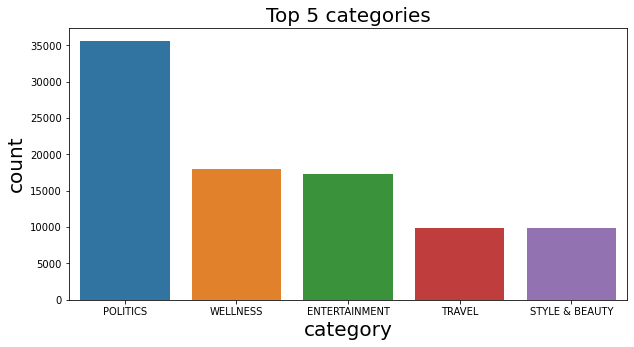

In [18]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
category_label = df.category.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(category_label.index, category_label)
plt.xlabel('category', fontsize=20)
plt.ylabel('count', fontsize=20);
plt.title('Top 5 categories', fontsize=20);

In [17]:
print("heloo")

heloo


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
epochs = [i for i in range(4)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [ ]:
df['text'] = df.headline + " " + df.short_description

In [ ]:
ef clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", text)
    return text

In [ ]:
df.text = df.text.apply(clean_text)

In [ ]:
types = df.category.unique()
def get_type_index(string):
    return list(types).index(string)
df['type_index'] = df['category'].apply(get_type_index)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
train, val = train_test_split(train)

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df.text.values)

ModuleNotFoundError: No module named 'tensorflow'

In [36]:
len_news
# produce pandas profiling report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [45]:
# create final dataframe of combined headline and short_description
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
final_df = new_df.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df['len_news'] = final_df['length_of_news'].map(lambda x: len(x))
final_df.head()

NameError: name 'new_df' is not defined

In [40]:
lenmax_df = df.groupby('category')['short_description'].max().reset_index().sort_values(by='short_description',ascending=False)
lenmax_df.head()

,category,short_description
25,QUEER VOICES,🦄 🦄 🦄
18,IMPACT,🤢 🤢 🤢
10,ENTERTAINMENT,🤘🤘🤘
19,LATINO VOICES,🤔🤔🤔
24,POLITICS,🤔🤔🤔


In [46]:
# minimum lenght of news in each category
lenmin_df = df.groupby('category')['short_description'].min().reset_index().sort_values(by='short_description',ascending=False)
lenmin_df.head()

,category,short_description
35,U.S. NEWS,"""A miracle,"" the teen's mother said of the res..."
36,WEDDINGS,"""A bride should look at everything she possibl..."
8,DIVORCE,"""A break""? Blame it on all the ""Friends"" episo..."
1,ARTS & CULTURE,"""A 7-year-old can dream up things in a way tha..."
33,THE WORLDPOST,"""#TheresaTheAppeaser refuses to upset her new ..."


In [ ]:
# plot the bar plots of max and min length of news articles
lenmax_df = df.groupby('category')['headline'].max().reset_index().sort_values(by='headline',ascending=False)
lenmin_df = df.groupby('category')['headline'].min().reset_index().sort_values(by='headline',ascending=False)
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.bar(lenmax_df['category'][:10],lenmax_df['headline'][:10])
plt.xticks(rotation=45)
plt.ylabel("Words length in news categories", size=14)
plt.xlabel("News categories",  size=14)
plt.text(6.5,1400, '''       POLITICS HAS 
 THE LONGEST ARTICLE''', fontsize=12)
plt.title("Max length top 10 news categories", size=14)

plt.subplot(122)
plt.bar(lenmin_df['category'][:10], lenmin_df['headline'][:10])
plt.xticks(rotation=45)
plt.xlabel("News categories", size=14)
plt.title("Min length of top 10 news categories", size=14)

plt.show()

In [59]:
print("heloo")

heloo
